Dataset Shape: (187, 15)
First 5 Rows:
  Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             63                2.95                  56.25   
2            749                4.16                  67.34   
3              0                5.73                  88.53   
4              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                    5.04     

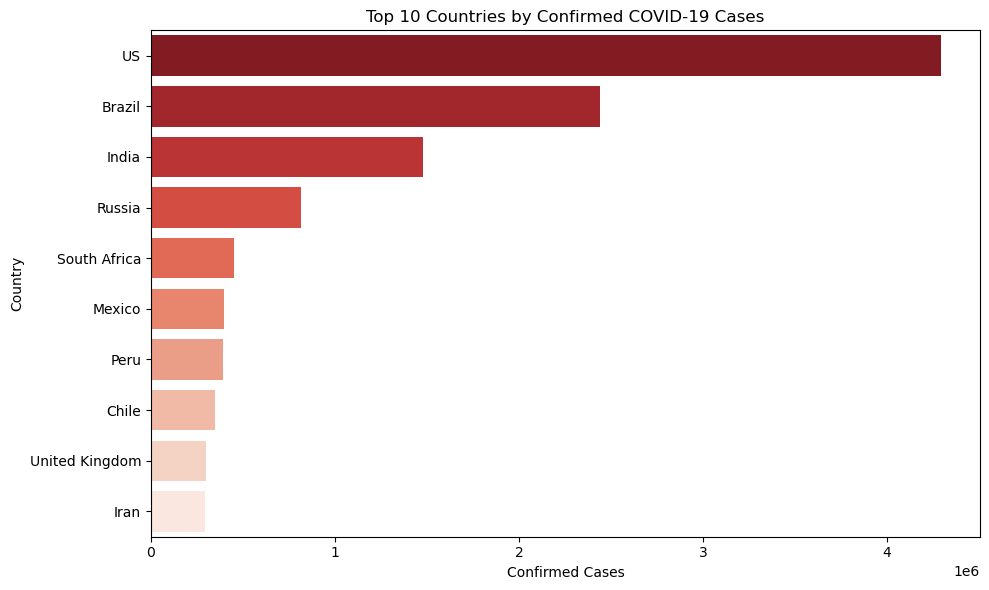

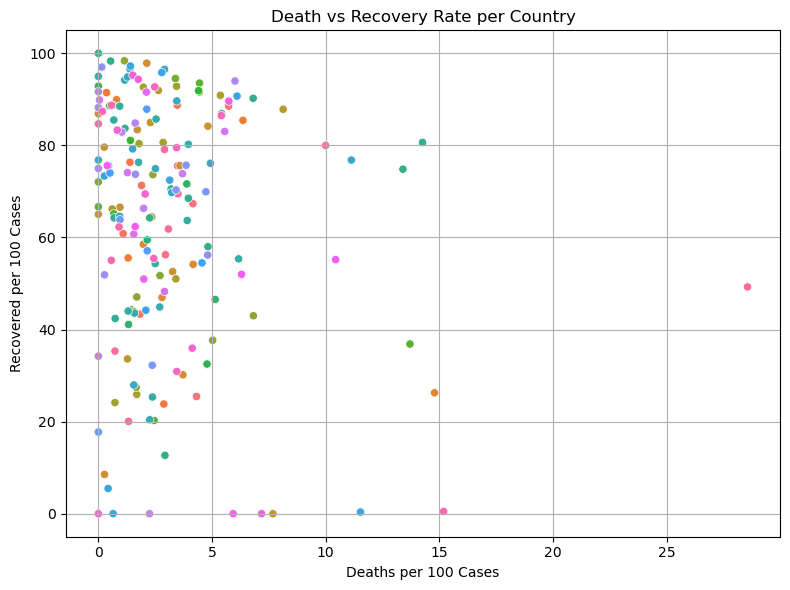


Average Death Rate per 100 Cases: 3.02
Average Recovery Rate per 100 Cases: 64.82

Countries with unusually high death rates:
     Country/Region  DeathRatePer100Cases
16          Belgium                 14.79
61           France                 13.71
77          Hungary                 13.40
85            Italy                 14.26
177  United Kingdom                 15.19
184           Yemen                 28.56


In [4]:
# Project Title : COVID-19 Country-wise Data Analysis using Python
# Author        : Shama P S
# Description   : This project analyzes the global COVID-19 impact using the 
#                 'country_wise_latest.csv' dataset. It includes data loading, 
#                 cleaning, exploratory data analysis (EDA), and visualization 
#                 of key metrics such as confirmed cases, death rates, and 
#                 recovery rates. The project highlights trends and identifies 
#                 countries with unusually high fatality ratios.
# Tools Used    : Python, NumPy, Pandas, Matplotlib, Seaborn
# Dataset Source: COVID-19 Dataset - country_wise_latest.csv (Kaggle)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('country_wise_latest.csv')
print("Dataset Shape:", df.shape)
print("First 5 Rows:")
print(df.head())
print("\nMissing Values:")
print(df.isnull().sum())
df.fillna(0, inplace=True)
df.rename(columns={
    'Deaths / 100 Cases': 'DeathRatePer100Cases',
    'Recovered / 100 Cases': 'RecoveryRatePer100Cases'
}, inplace=True)
top_confirmed = df.sort_values(by='Confirmed', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='Confirmed', y='Country/Region',hue='Country/Region', data=top_confirmed, palette='Reds_r',dodge=False,legend=False)
plt.title('Top 10 Countries by Confirmed COVID-19 Cases')
plt.xlabel('Confirmed Cases')
plt.ylabel('Country')
plt.tight_layout()
plt.show()
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='DeathRatePer100Cases',
    y='RecoveryRatePer100Cases',
    data=df,
    hue='Country/Region',
    legend=False
)
plt.title('Death vs Recovery Rate per Country')
plt.xlabel('Deaths per 100 Cases')
plt.ylabel('Recovered per 100 Cases')
plt.grid(True)
plt.tight_layout()
plt.show()
avg_death_rate = df['DeathRatePer100Cases'].mean()
avg_recovery_rate = df['RecoveryRatePer100Cases'].mean()

print(f"\nAverage Death Rate per 100 Cases: {avg_death_rate:.2f}")
print(f"Average Recovery Rate per 100 Cases: {avg_recovery_rate:.2f}")

# Countries with unusually high death rates
high_death = df[df['DeathRatePer100Cases'] > avg_death_rate + 10]
print("\nCountries with unusually high death rates:")
print(high_death[['Country/Region', 'DeathRatePer100Cases']])